# Анализ данных и A/B тестирование для ресторана быстрого питания.


Сценарий

Сеть ресторанов быстрого питания планирует добавить в свое меню новый пункт. Однако они до сих пор не определились между тремя возможными маркетинговыми кампаниями по продвижению нового продукта. Чтобы определить, какое продвижение оказывает наибольшее влияние на продажи, новый товар выставляется в точках на нескольких случайно выбранных рынках. В каждом магазине используется отдельная акция, и еженедельные продажи нового товара регистрируются в течение первых четырех недель.

Загрузим необходимые данные и библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.1 MB 22.8 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 13.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344582 sha256=caef073fa8b1baa20f29cac9dc5e1cc81dcfa87e401341a3ce8e8888972a79cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-hfy702x3/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sh

In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1WBYVVcwddl0DAqKswIQ7VR0v0H46VZy9/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=1WBYVVcwddl0DAqKswIQ7VR0v0H46VZy9
To: /content/WA_Marketing-Campaign.csv
100% 14.2k/14.2k [00:00<00:00, 21.6MB/s]


# EDA(exploratory data analysis)
Проведём первичный анализ датасета при помощи библиотеки pandas-profiling

In [4]:
df = pd.read_csv("/content/WA_Marketing-Campaign.csv")
df = df.rename(str.lower, axis='columns')
df.head(10)

,marketid,marketsize,locationid,ageofstore,promotion,week,salesinthousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [5]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from pandas_profiling import ProfileReport

In [7]:
Report = ProfileReport(df)

In [8]:
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

По результатам анализа можно понять, что:
в выборке отсутствуют пустые значения и дубликаты

*  В выборке отсутствуют пропущенные значения и дубликаты
*  есть некоторая связь между размером рынка(marketsize) и продажами



# Статистические тесты

Так как ключевым показателем является тип рекламы, то для проведения статистических тестов выборку следует разбить на три группы по этому показателю.

In [9]:
prom1 = df[df['promotion'] == 1]
prom2 = df[df['promotion'] == 2]
prom3 = df[df['promotion'] == 3]

In [10]:
prom1.shape


(172, 7)

In [11]:
prom2.shape

(188, 7)

In [12]:
prom3.shape

(188, 7)

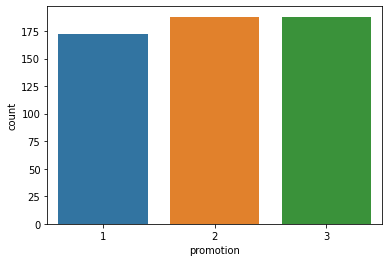

In [13]:
sns.countplot(x ='promotion', data = df) 

plt.show() 

Как видим, первая группа меньше остальных.
Проверим нормальность распределения при помощи критерия Шапиро-Уилка

Гипотезы следующие:
H0: переменная нормально распределена.
H1: переменная НЕ имеет нормального распределения.

Если p-значение> 0,05: тогда нулевая гипотеза не может быть отклонена (т. е. переменная МОЖЕТ БЫТЬ нормально распределенной).
Если p-значение ≤ 0,05: тогда нулевую гипотезу можно отклонить (т. е. переменная НЕ имеет нормального распределения).

In [14]:
test_stat, pvalue = stats.shapiro(prom1["salesinthousands"])
pvalue

1.977244323825289e-08

In [15]:
test_stat, pvalue = stats.shapiro(prom2["salesinthousands"])
pvalue

5.456262108793908e-09

In [16]:
test_stat, pvalue = stats.shapiro(prom3["salesinthousands"])
pvalue

1.499518376135711e-08

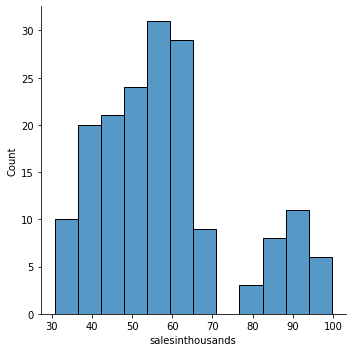

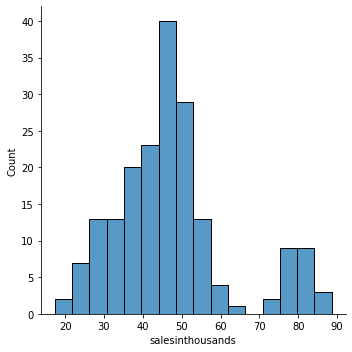

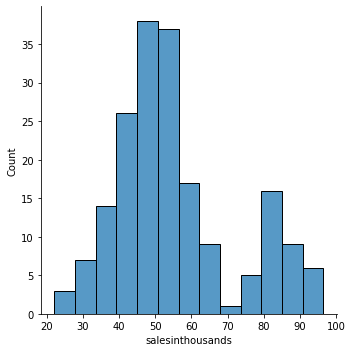

In [17]:
sns.displot(prom1, x="salesinthousands")
sns.displot(prom2, x="salesinthousands")
sns.displot(prom3, x="salesinthousands")

По результатом теста понятно, что во всех трёх группах показатель продаж не имеет нормальное распределение ( это же видно и на графике).

Для проведения статистического теста на трёх группах с отличным от нормального распределением воспользуемся критерием Тьюки

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [19]:
tukey = pairwise_tukeyhsd(endog=df['salesinthousands'],
                          groups=df['promotion'],
                          alpha=0.05)
        
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


Таким образом, существует статистически значимая разница между средними значениями групп 1 и 2 и групп 2 и 3, но нет статистически значимой разницы между средними значениями групп 1 и 3. 

In [20]:
df_pro = df.groupby(["promotion"]).agg({"salesinthousands":["count","mean","median","sum"]})
df_pro

salesinthousands                             
                     count       mean  median       sum
promotion                                              
1                      172  58.099012  55.385   9993.03
2                      188  47.329415  45.385   8897.93
3                      188  55.364468  51.165  10408.52

Как видим, по всем показателям группа 2 уступает группам 1 и 3, а потому этот вид рекламы не является приоритетным. С другой стороны видно, что хоть и группа 1 утсупает по общей сумме продаж группе 3, по среднему числу продаж группа 1 лучше. Какой же тест следует выбрать? Для этого надо посмотреть на другие показатели.

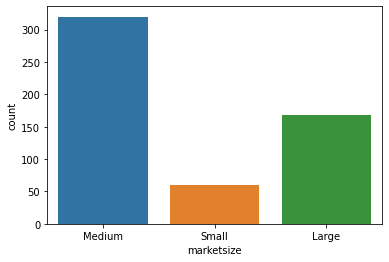

In [21]:
sns.countplot(x ='marketsize', data = df)  
plt.show() 


Посмотрим на уровень продаж в зависимости от marketsize

In [22]:
df_mark = df.groupby(["marketsize"]).agg({"salesinthousands":["count","mean","median","sum"]})
df_mark


salesinthousands                             
                      count       mean  median       sum
marketsize                                              
Large                   168  70.116726  75.020  11779.61
Medium                  320  43.985344  44.590  14075.31
Small                    60  57.409333  57.555   3444.56

Как видим, large в среднем гораздно лучше остальных групп. Проверим статистическую значимость.

In [23]:
mark1 = df[df['marketsize'] == "Small"]
mark2 = df[df['marketsize'] == "Medium"]
mark3 = df[df['marketsize'] == "Large"]

In [24]:
test_stat, pvalue = stats.shapiro(mark1["salesinthousands"])
pvalue

0.34099963307380676

In [25]:
test_stat, pvalue = stats.shapiro(mark2["salesinthousands"])
pvalue

0.11778566241264343

In [26]:
test_stat, pvalue = stats.shapiro(mark3["salesinthousands"])
pvalue

6.401194241334451e-08

Для mark1 и mark2 нормальное распределение выполняется, для mark3 - нет.

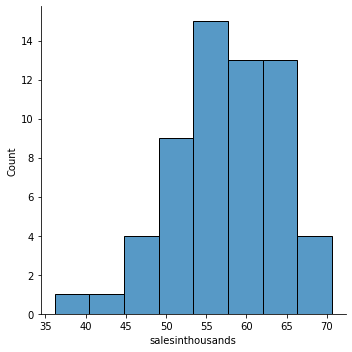

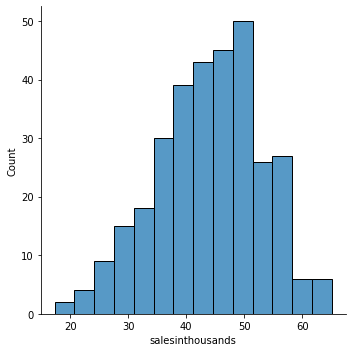

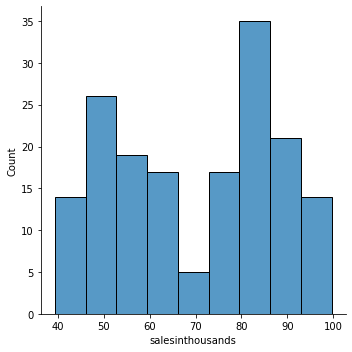

In [27]:
sns.displot(mark1, x="salesinthousands")
sns.displot(mark2, x="salesinthousands")
sns.displot(mark3, x="salesinthousands")

Проведём тест Тьюки

In [28]:
tukey = pairwise_tukeyhsd(endog=df['salesinthousands'],
                          groups=df['marketsize'],
                          alpha=0.05)
        
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 Large Medium -26.1314  -0.0 -28.7979 -23.4649   True
 Large  Small -12.7074   0.0 -16.9165  -8.4982   True
Medium  Small   13.424  -0.0   9.4867  17.3613   True
-----------------------------------------------------


Во всех трёх случая мы отвергаем гипотезу об отсутствии значимой статистической значимости т.е Large marketsize в среднем действительно лучше. Посмотрим его распределение среди групп promotion

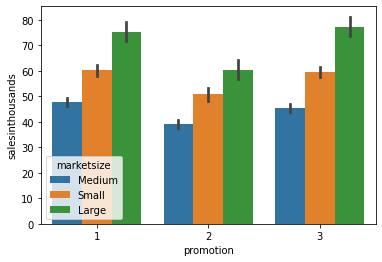

In [29]:
sns.barplot(x=df["promotion"], y=df["salesinthousands"], hue=df["marketsize"], data=df)

Как мы видим, в первом и третьем случае распределения по marketsize примерно равны, что позволяет судить об относительном равенстве двух рекламных стратегий ( в том плане, что marketsize не оказывает сильного влияния на разницу в объёмах продаж между promotion 1 и promotion 3)

# Вывод
На основании вышеприведенных данных можно сделать вывод, что компания должна выбрать марктинговую стратегию 1 или 3.